### Source

https://plotly.com/python/

In [1]:
### Libraries
import plotly.express as px
import plotly.io as pio 
#pio.templates #pio.templates.default = "none"
#pio.renderers #pio.renderers.default = "plotly_mimetype+notebook" #default
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import urllib, json
import pandas as pd
import numpy as np
import re

### Standalone HTML

In [2]:
#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.write_html('first_figure.html', auto_open=True)

### Candlestick

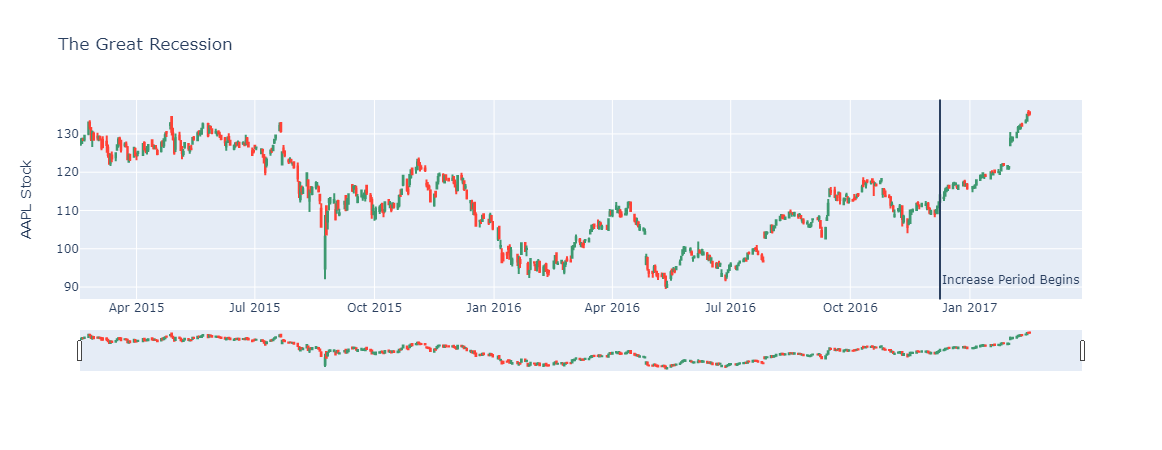

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                      ])

fig.update_layout(
    title='The Great Recession',
    yaxis_title='AAPL Stock',
    shapes = [dict(
        x0='2016-12-09', x1='2016-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

### Indicators

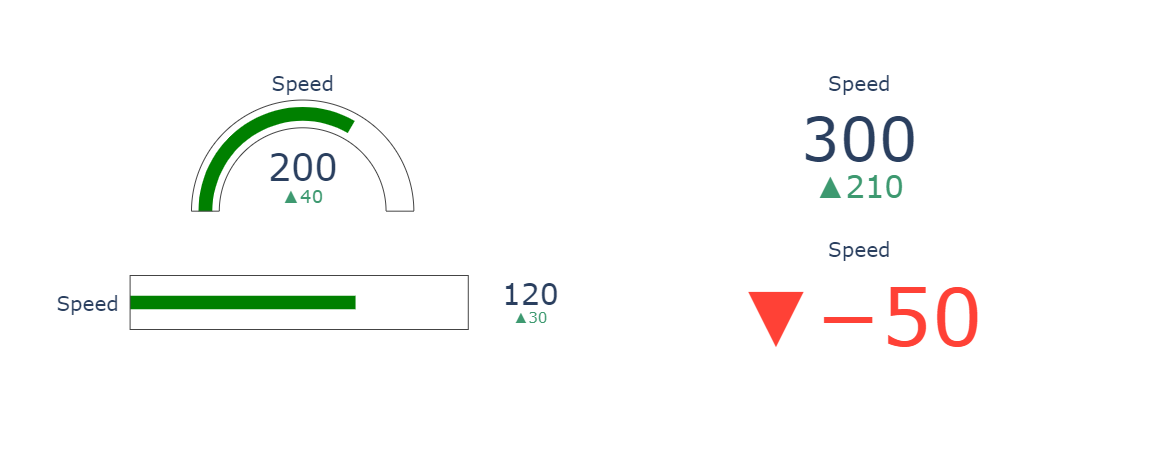

In [4]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    value = 200,
    delta = {'reference': 160},
    gauge = {
        'axis': {'visible': False}},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    value = 120,
    gauge = {
        'shape': "bullet",
        'axis' : {'visible': False}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 300,
    domain = {'row': 0, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "delta",
    value = 40,
    domain = {'row': 1, 'column': 1}))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

### Information above Chart

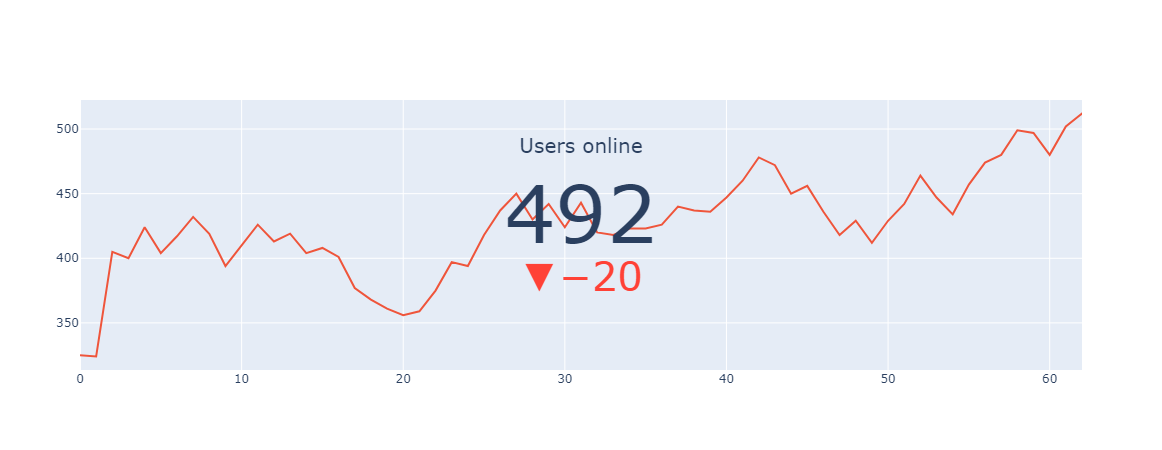

In [5]:
fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = 492,
    delta = {"reference": 512, "valueformat": ".0f"},
    title = {"text": "Users online"},
    domain = {'y': [0, 1], 'x': [0.25, 0.75]}))

fig.add_trace(go.Scatter(
    y = [325, 324, 405, 400, 424, 404, 417, 432, 419, 394, 410, 426, 413, 419, 404, 408, 401, 377, 368, 361, 356, 359, 375, 397, 394, 418, 437, 450, 430, 442, 424, 443, 420, 418, 423, 423, 426, 440, 437, 436, 447, 460, 478, 472, 450, 456, 436, 418, 429, 412, 429, 442, 464, 447, 434, 457, 474, 480, 499, 497, 480, 502, 512, 492]))

fig.update_layout(xaxis = {'range': [0, 62]})
fig.show()

### Gauge

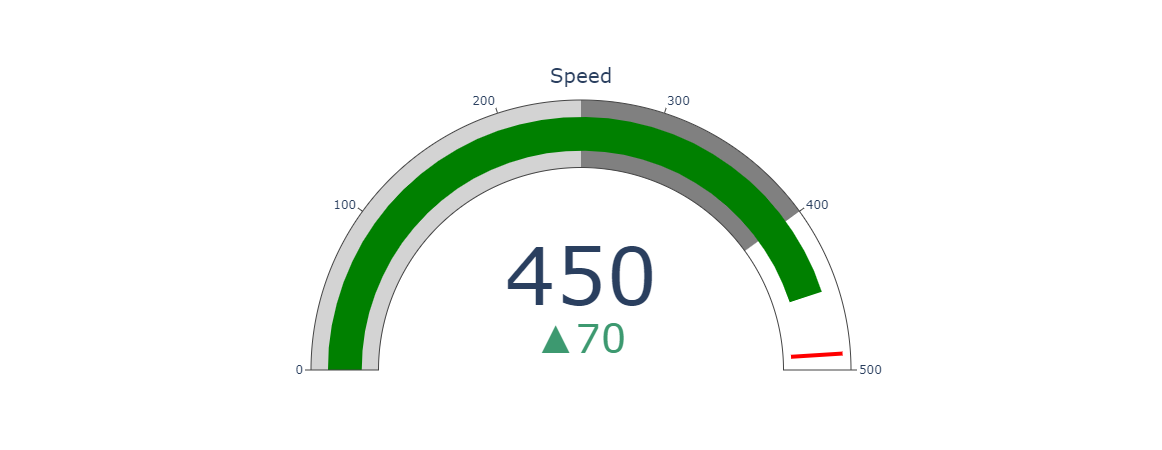

In [6]:
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 450,
    mode = "gauge+number+delta",
    title = {'text': "Speed"},
    delta = {'reference': 380},
    gauge = {'axis': {'range': [None, 500]},
             'steps' : [
                 {'range': [0, 250], 'color': "lightgray"},
                 {'range': [250, 400], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 490}}))
fig.show()

### Range of axes

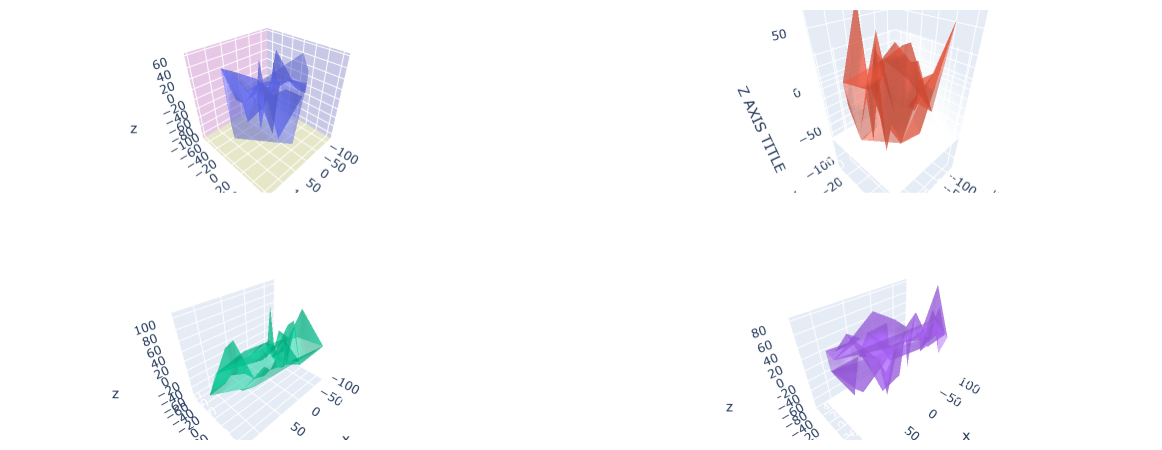

In [7]:
N = 50

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}],
                           [{'is_3d': True}, {'is_3d': True}]],
                    print_grid=False)
for i in [1,2]:
    for j in [1,2]:
        fig.append_trace(
            go.Mesh3d(
                x=(60*np.random.randn(N)),
                y=(25*np.random.randn(N)),
                z=(40*np.random.randn(N)),
                opacity=0.5,
              ),
            row=i, col=j)

fig.update_layout(width=700, margin=dict(r=10, l=10, b=10, t=10))
# fix the ratio in the top left subplot to be a cube
fig.update_layout(scene_aspectmode='cube')
# manually force the z-axis to appear twice as big as the other two
fig.update_layout(scene2_aspectmode='manual',
                  scene2_aspectratio=dict(x=1, y=1, z=2))
# draw axes in proportion to the proportion of their ranges
fig.update_layout(scene3_aspectmode='data')
# automatically produce something that is well proportioned using 'data' as the default
fig.update_layout(scene4_aspectmode='auto')


fig.update_layout(scene2 = dict(
                    xaxis_title='X AXIS TITLE',
                    yaxis_title='Y AXIS TITLE',
                    zaxis_title='Z AXIS TITLE'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))


# xaxis.backgroundcolor is used to set background color
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )


fig.show()

### Surface Plot With Contours

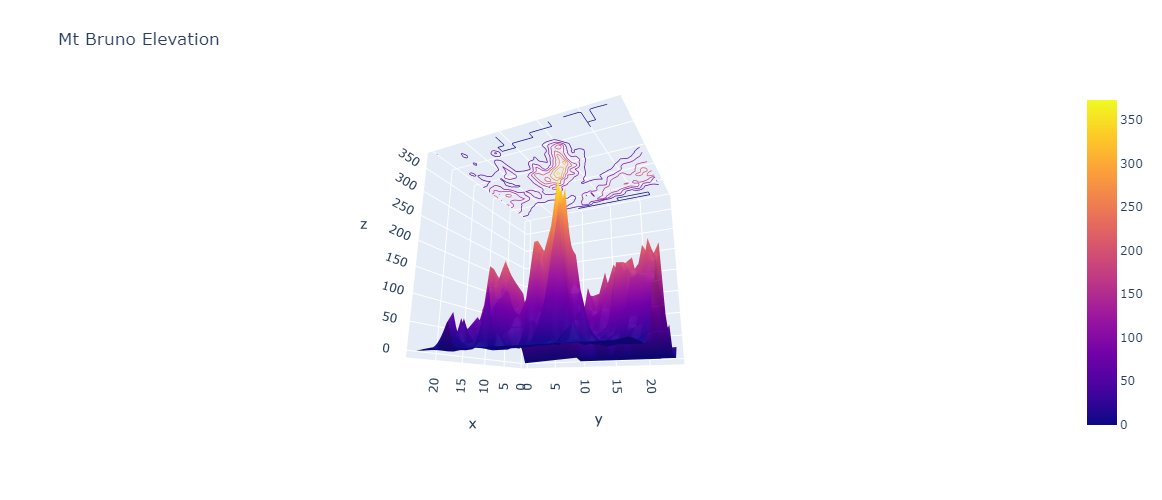

In [8]:
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

### 3D Surface Subplots

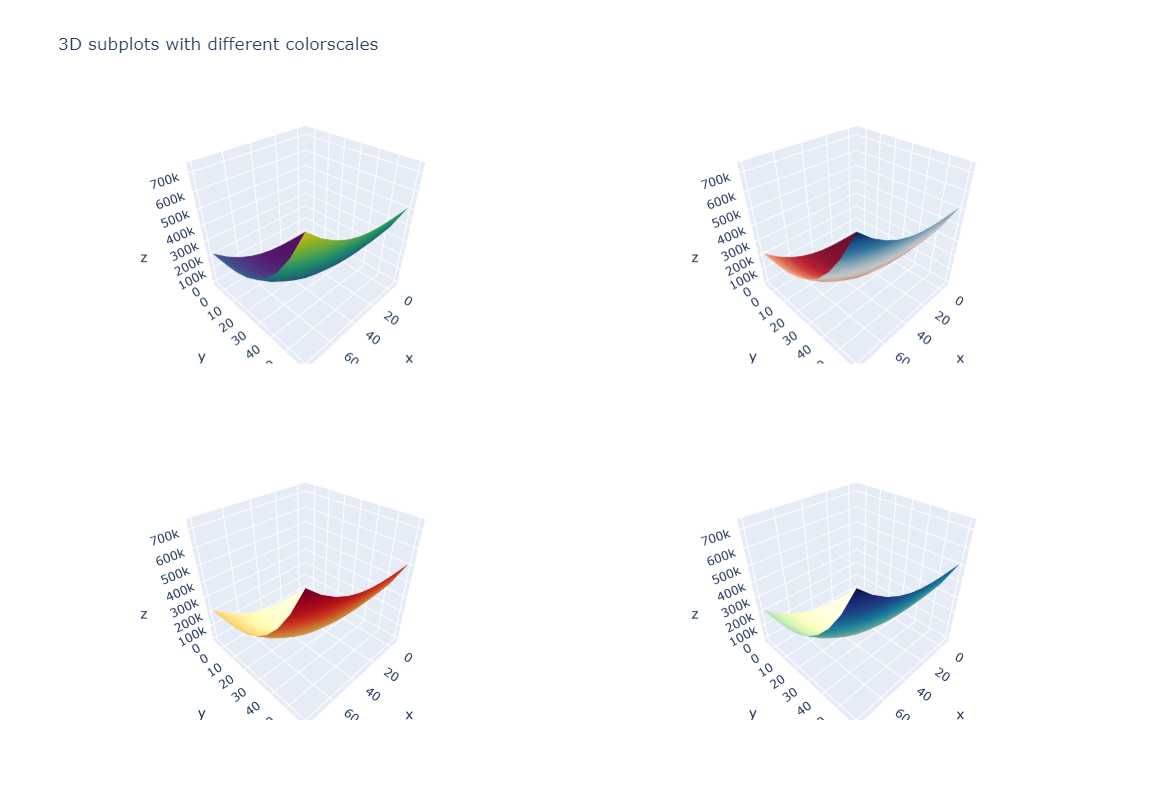

In [9]:
# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]])


# Generate data
x = np.linspace(-5, 80, 10)
y = np.linspace(-5, 60, 10)
xGrid, yGrid = np.meshgrid(y, x)
z = xGrid ** 3 + yGrid ** 3

# adding surfaces to subplots.
fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='RdBu', showscale=False),
    row=1, col=2)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlOrRd', showscale=False),
    row=2, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=z, colorscale='YlGnBu', showscale=False),
    row=2, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()

### Table and Chart Subplots

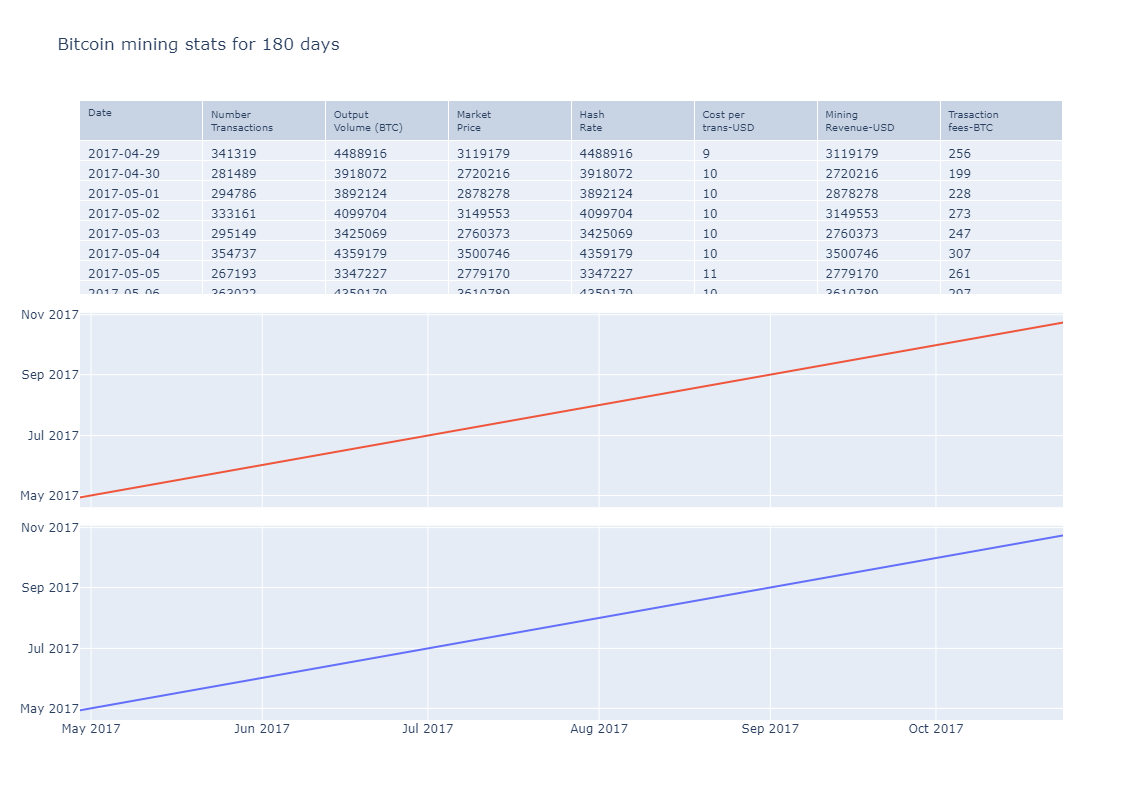

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

for i, row in enumerate(df["Date"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(df["Date"][i])[0]
    df.iloc[i, 1] = datetime

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Date"], # other columns are not working
        mode="lines",
        name="mining revenue"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Date"],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Number<br>Transactions", "Output<br>Volume (BTC)",
                    "Market<br>Price", "Hash<br>Rate", "Cost per<br>trans-USD",
                    "Mining<br>Revenue-USD", "Trasaction<br>fees-BTC"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[1:]],
            align = "left")
    ),
    row=1, col=1
)
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Bitcoin mining stats for 180 days",
)

fig.show()

### Horizontal Table and Chart

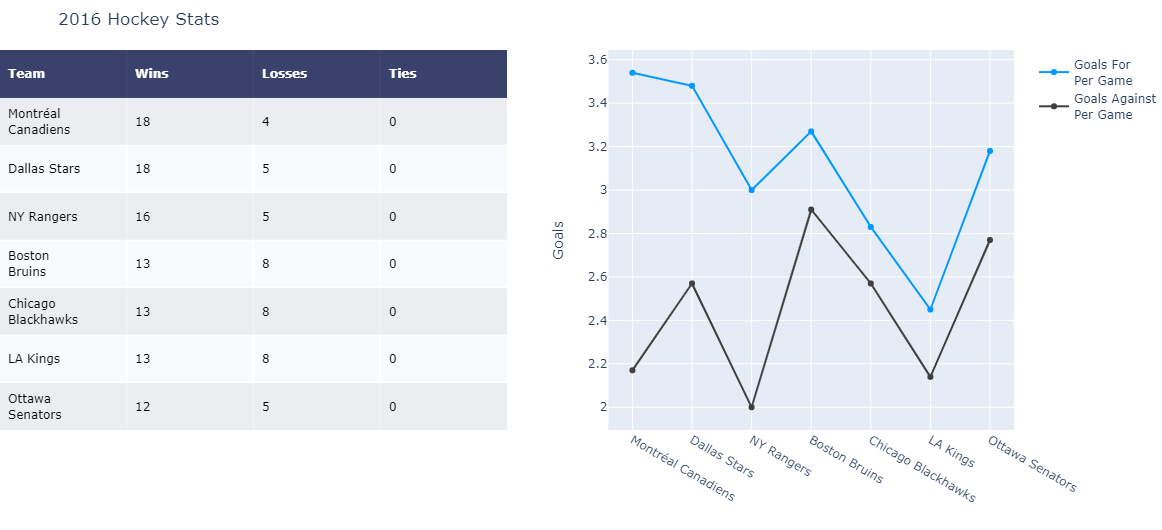

In [11]:
table_data = [['Team', 'Wins', 'Losses', 'Ties'],
              ['Montréal<br>Canadiens', 18, 4, 0],
              ['Dallas Stars', 18, 5, 0],
              ['NY Rangers', 16, 5, 0],
              ['Boston<br>Bruins', 13, 8, 0],
              ['Chicago<br>Blackhawks', 13, 8, 0],
              ['LA Kings', 13, 8, 0],
              ['Ottawa<br>Senators', 12, 5, 0]]

fig = ff.create_table(table_data, height_constant=60)

teams = ['Montréal Canadiens', 'Dallas Stars', 'NY Rangers',
         'Boston Bruins', 'Chicago Blackhawks', 'LA Kings', 'Ottawa Senators']
GFPG = [3.54, 3.48, 3.0, 3.27, 2.83, 2.45, 3.18]
GAPG = [2.17, 2.57, 2.0, 2.91, 2.57, 2.14, 2.77]

trace1 = go.Scatter(x=teams, y=GFPG,
                    marker=dict(color='#0099ff'),
                    name='Goals For<br>Per Game',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=teams, y=GAPG,
                    marker=dict(color='#404040'),
                    name='Goals Against<br>Per Game',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': '2016 Hockey Stats'})

fig.show()

### Histogram Binning

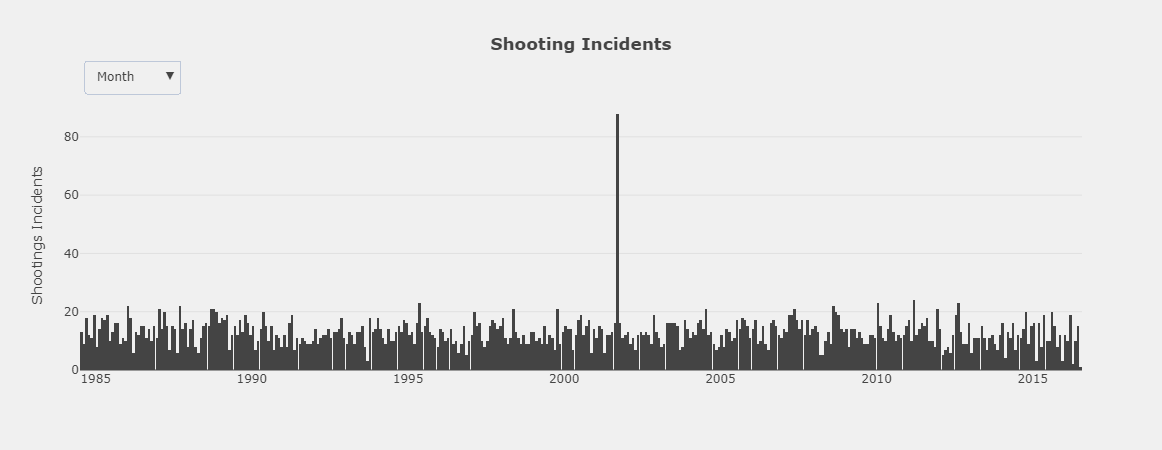

In [12]:
df = pd.read_csv("https://plotly.com/~public.health/17.csv")

data = [dict(
  x = df['date'],
  autobinx = False,
  autobiny = True,
  marker = dict(color = 'rgb(68, 68, 68)'),
  name = 'date',
  type = 'histogram',
  xbins = dict(
    end = '2016-12-31 12:00',
    size = 'M1',
    start = '1983-12-31 12:00'
  )
)]

layout = dict(
  paper_bgcolor = 'rgb(240, 240, 240)',
  plot_bgcolor = 'rgb(240, 240, 240)',
  title = '<b>Shooting Incidents</b>',
  xaxis = dict(
    title = '',
    type = 'date'
  ),
  yaxis = dict(
    title = 'Shootings Incidents',
    type = 'linear'
  ),
  updatemenus = [dict(
        x = 0.1,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = True,
        buttons = [
        dict(
            args = ['xbins.size', 'D1'],
            label = 'Day',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M1'],
            label = 'Month',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M3'],
            label = 'Quater',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M6'],
            label = 'Half Year',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M12'],
            label = 'Year',
            method = 'restyle',
        )]
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

### Relayout Button

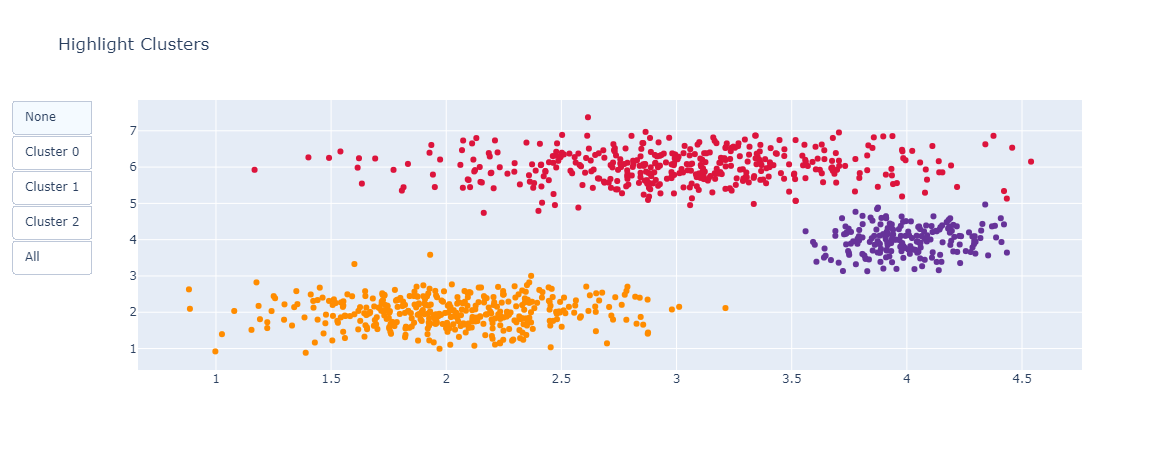

In [13]:
np.random.seed(1)

x0 = np.random.normal(2, 0.4, 400)
y0 = np.random.normal(2, 0.4, 400)
x1 = np.random.normal(3, 0.6, 600)
y1 = np.random.normal(6, 0.4, 400)
x2 = np.random.normal(4, 0.2, 200)
y2 = np.random.normal(4, 0.4, 200)

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="DarkOrange")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="Crimson")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="RebeccaPurple")
    )
)

# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="DarkOrange"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="Crimson"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="RebeccaPurple"))]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="Cluster 0",
                     method="relayout",
                     args=["shapes", cluster0]),
                dict(label="Cluster 1",
                     method="relayout",
                     args=["shapes", cluster1]),
                dict(label="Cluster 2",
                     method="relayout",
                     args=["shapes", cluster2]),
                dict(label="All",
                     method="relayout",
                     args=["shapes", cluster0 + cluster1 + cluster2])
            ],
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=False,
)

fig.show()

### Update Dropdown

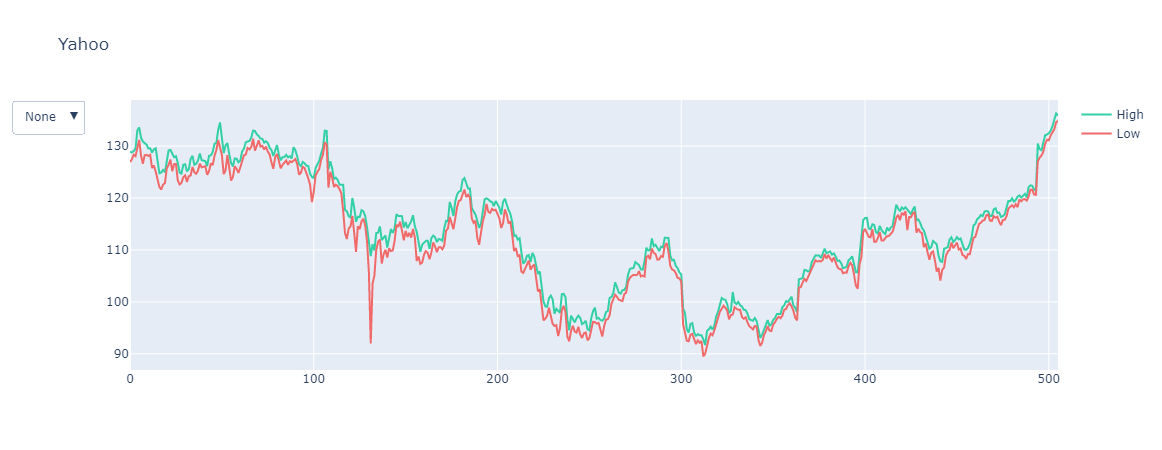

In [14]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()

### Range Slider with Vertically Stacked Subplots

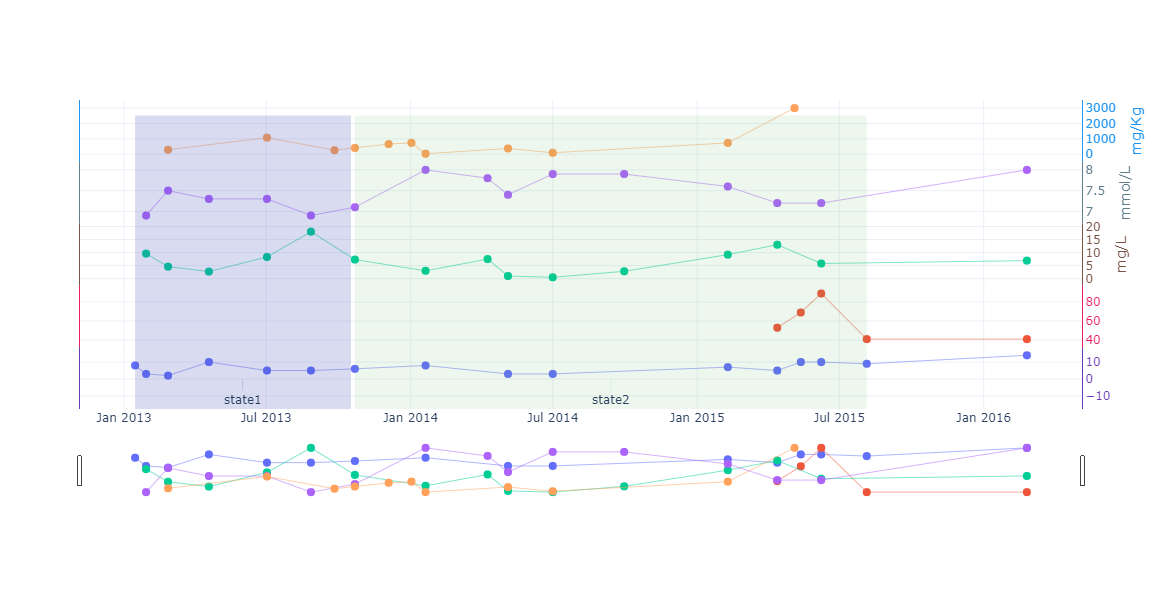

In [15]:
# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(
    x=["2013-01-15", "2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02",
       "2013-08-27",
       "2013-10-22", "2014-01-20", "2014-05-05", "2014-07-01", "2015-02-09",
       "2015-04-13",
       "2015-05-13", "2015-06-08", "2015-08-05", "2016-02-25"],
    y=["8", "3", "2", "10", "5", "5", "6", "8", "3", "3", "7", "5", "10", "10", "9",
       "14"],
    name="var0",
    text=["8", "3", "2", "10", "5", "5", "6", "8", "3", "3", "7", "5", "10", "10", "9",
          "14"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["2015-04-13", "2015-05-13", "2015-06-08", "2015-08-05", "2016-02-25"],
    y=["53.0", "69.0", "89.0", "41.0", "41.0"],
    name="var1",
    text=["53.0", "69.0", "89.0", "41.0", "41.0"],
    yaxis="y2",
))

fig.add_trace(go.Scatter(
    x=["2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02", "2013-08-27",
       "2013-10-22",
       "2014-01-20", "2014-04-09", "2014-05-05", "2014-07-01", "2014-09-30",
       "2015-02-09",
       "2015-04-13", "2015-06-08", "2016-02-25"],
    y=["9.6", "4.6", "2.7", "8.3", "18", "7.3", "3", "7.5", "1.0", "0.5", "2.8", "9.2",
       "13", "5.8", "6.9"],
    name="var2",
    text=["9.6", "4.6", "2.7", "8.3", "18", "7.3", "3", "7.5", "1.0", "0.5", "2.8",
          "9.2",
          "13", "5.8", "6.9"],
    yaxis="y3",
))

fig.add_trace(go.Scatter(
    x=["2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02", "2013-08-27",
       "2013-10-22",
       "2014-01-20", "2014-04-09", "2014-05-05", "2014-07-01", "2014-09-30",
       "2015-02-09",
       "2015-04-13", "2015-06-08", "2016-02-25"],
    y=["6.9", "7.5", "7.3", "7.3", "6.9", "7.1", "8", "7.8", "7.4", "7.9", "7.9", "7.6",
       "7.2", "7.2", "8.0"],
    name="var3",
    text=["6.9", "7.5", "7.3", "7.3", "6.9", "7.1", "8", "7.8", "7.4", "7.9", "7.9",
          "7.6",
          "7.2", "7.2", "8.0"],
    yaxis="y4",
))

fig.add_trace(go.Scatter(
    x=["2013-02-26", "2013-07-02", "2013-09-26", "2013-10-22", "2013-12-04",
       "2014-01-02",
       "2014-01-20", "2014-05-05", "2014-07-01", "2015-02-09", "2015-05-05"],
    y=["290", "1078", "263", "407", "660", "740", "33", "374", "95", "734", "3000"],
    name="var4",
    text=["290", "1078", "263", "407", "660", "740", "33", "374", "95", "734", "3000"],
    yaxis="y5",
))

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines+markers",
    showlegend=False
)

# Add annotations
fig.update_layout(
    annotations=[
        dict(
            x="2013-06-01",
            y=0,
            arrowcolor="rgba(63, 81, 181, 0.2)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="state1",
            xref="x",
            yanchor="bottom",
            yref="y"
        ),
        dict(
            x="2014-09-13",
            y=0,
            arrowcolor="rgba(76, 175, 80, 0.1)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="state2",
            xref="x",
            yanchor="bottom",
            yref="y"
        )
    ],
)

# Add shapes
fig.update_layout(
    shapes=[
        dict(
            fillcolor="rgba(63, 81, 181, 0.2)",
            line={"width": 0},
            type="rect",
            x0="2013-01-15",
            x1="2013-10-17",
            xref="x",
            y0=0,
            y1=0.95,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(76, 175, 80, 0.1)",
            line={"width": 0},
            type="rect",
            x0="2013-10-22",
            x1="2015-08-05",
            xref="x",
            y0=0,
            y1=0.95,
            yref="paper"
        )
    ]
)

# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=["2012-10-31 18:36:37.3129", "2016-05-10 05:23:22.6871"],
        rangeslider=dict(
            autorange=True,
            range=["2012-10-31 18:36:37.3129", "2016-05-10 05:23:22.6871"]
        ),
        type="date"
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.2],
        linecolor="#673ab7",
        mirror=True,
        range=[-60.0858369099, 28.4406294707],
        showline=True,
        side="right",
        tickfont={"color": "#673ab7"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#673ab7"},
        type="linear",
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.2, 0.4],
        linecolor="#E91E63",
        mirror=True,
        range=[29.3787777032, 100.621222297],
        showline=True,
        side="right",
        tickfont={"color": "#E91E63"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#E91E63"},
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.4, 0.6],
        linecolor="#795548",
        mirror=True,
        range=[-3.73690396239, 22.2369039624],
        showline=True,
        side="right",
        tickfont={"color": "#795548"},
        tickmode="auto",
        ticks="",
        title="mg/L",
        titlefont={"color": "#795548"},
        type="linear",
        zeroline=False
    ),
    yaxis4=dict(
        anchor="x",
        autorange=True,
        domain=[0.6, 0.8],
        linecolor="#607d8b",
        mirror=True,
        range=[6.63368032236, 8.26631967764],
        showline=True,
        side="right",
        tickfont={"color": "#607d8b"},
        tickmode="auto",
        ticks="",
        title="mmol/L",
        titlefont={"color": "#607d8b"},
        type="linear",
        zeroline=False
    ),
    yaxis5=dict(
        anchor="x",
        autorange=True,
        domain=[0.8, 1],
        linecolor="#2196F3",
        mirror=True,
        range=[-685.336803224, 3718.33680322],
        showline=True,
        side="right",
        tickfont={"color": "#2196F3"},
        tickmode="auto",
        ticks="",
        title="mg/Kg",
        titlefont={"color": "#2196F3"},
        type="linear",
        zeroline=False
    )
)

# Update layout
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

fig.show()

### Slider and Buttons

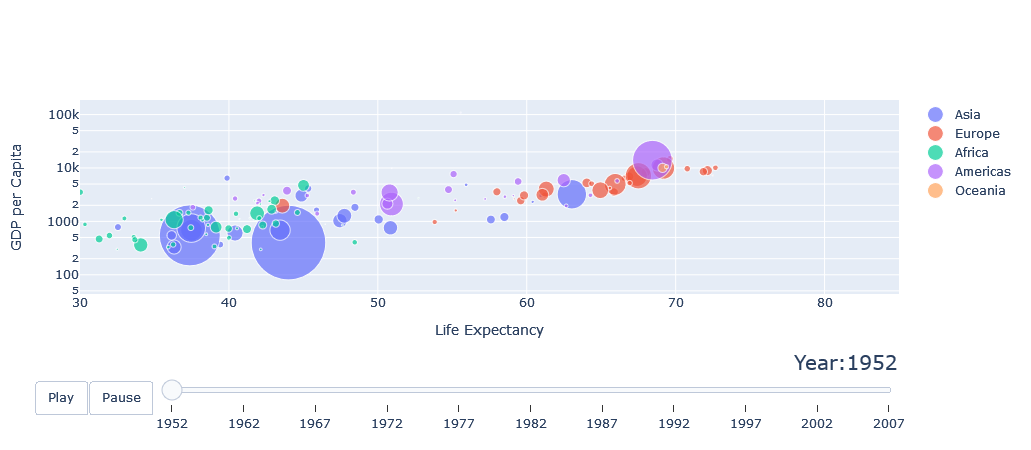

In [16]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"

dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()